# Lab 4 - Part 2: Document Classification, Sentiment Analysis & Topic Modeling

**Course:** Natural Language Processing

**Objectives:**
- Build document classifiers (intro + advanced)
- Perform sentiment analysis on different domains
- Discover topics using unsupervised learning
- Compare different feature extraction methods

---

## Instructions

1. Complete all exercises marked with `# YOUR CODE HERE`
2. **Answer all written questions** in the designated markdown cells
3. Save your completed notebook
4. **Push to your Git repository and send the link to: yoroba93@gmail.com**

### Personal Analysis Required

This lab contains questions requiring YOUR personal interpretation.

---

## Use Cases Covered

| Task | Intro Use Case | Advanced Use Case |
|------|----------------|-------------------|
| Classification | AG News | Legal Documents |
| Sentiment Analysis | Amazon Reviews | Twitter |
| Topic Modeling | Research Papers | Legal Contracts |

---

## Setup

In [ ]:
# Install required libraries (uncomment if needed)
# !pip install datasets scikit-learn nltk pandas numpy matplotlib seaborn wordcloud gensim

In [10]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# NLTK
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.pipeline import Pipeline

# Hugging Face datasets
from datasets import load_dataset

print("Setup complete!")

Setup complete!


In [2]:
# Common preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_simple(text):
    """Basic preprocessing: lowercase, remove punctuation."""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return ' '.join(text.split())

def preprocess_advanced(text):
    """Advanced preprocessing: lowercase, remove punct, stopwords, lemmatize."""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 2]
    return ' '.join(tokens)

print("Preprocessing functions ready!")

Preprocessing functions ready!


---

# PART A: Document Classification

We will work with two use cases:
1. **Intro:** News Topic Classification (AG News)
2. **Advanced:** Legal Document Classification (LexGLUE)

## A.1 Intro: News Topic Classification (AG News)

**Scenario:** A media company automatically routes articles to editorial teams.

**Feature Extraction:** TF-IDF

In [3]:
# Load AG News dataset
print("Loading AG News dataset...")
ag_news = load_dataset("ag_news")

# Use subset for faster processing
ag_train = pd.DataFrame(ag_news['train']).sample(n=8000, random_state=42)
ag_test = pd.DataFrame(ag_news['test']).sample(n=2000, random_state=42)

# Label mapping
ag_labels = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}
ag_train['label_name'] = ag_train['label'].map(ag_labels)
ag_test['label_name'] = ag_test['label'].map(ag_labels)

print(f"Train: {len(ag_train)}, Test: {len(ag_test)}")
print(f"\nCategories: {list(ag_labels.values())}")
print(ag_train['label_name'].value_counts())

Loading AG News dataset...


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Train: 8000, Test: 2000

Categories: ['World', 'Sports', 'Business', 'Sci/Tech']
label_name
Sports      2074
Sci/Tech    2021
Business    1959
World       1946
Name: count, dtype: int64


In [4]:
# Preprocess
ag_train['text_clean'] = ag_train['text'].apply(preprocess_simple)
ag_test['text_clean'] = ag_test['text'].apply(preprocess_simple)

# TF-IDF Vectorization
#tfrom sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_ag = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.9
)

X_train_ag = tfidf_ag.fit_transform(ag_train['text_clean'])
X_test_ag = tfidf_ag.transform(ag_test['text_clean'])

y_train_ag = ag_train['label']
y_test_ag = ag_test['label']

print(f"TF-IDF features: {X_train_ag.shape[1]}")


TF-IDF features: 5000


### Exercise A.1: Train a News Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
# TODO: Train a Logistic Regression classifier on AG News
# 1. Create the classifier
# 2. Train it
# 3. Make predictions
# 4. Calculate accuracy and F1-score (macro)


# 1. Create the classifier
clf_ag = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    multi_class="auto"
)

# 2. Train
clf_ag.fit(X_train_ag, y_train_ag)

# 3. Predict
y_pred_ag = clf_ag.predict(X_test_ag)

# 4. Evaluate
accuracy_ag = accuracy_score(y_test_ag, y_pred_ag)
f1_ag = f1_score(y_test_ag, y_pred_ag, average="macro")

print(f"AG News Classification Results:")
print(f"  Accuracy: {accuracy_ag:.4f}")
print(f"  F1 (macro): {f1_ag:.4f}")


AG News Classification Results:
  Accuracy: 0.8660
  F1 (macro): 0.8651


In [ ]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_ag, y_pred_ag, target_names=list(ag_labels.values())))


Classification Report:
              precision    recall  f1-score   support

       World       0.89      0.85      0.87       493
      Sports       0.91      0.95      0.93       504
    Business       0.82      0.80      0.81       474
    Sci/Tech       0.83      0.86      0.85       529

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



## A.2 Advanced: Legal Document Classification (LexGLUE - ECtHR)

**Scenario:** A law firm classifies court decisions by violated articles.

**Feature Extraction:** Bag of Words with N-grams

**Challenge:** Legal text is longer and uses specialized vocabulary.

In [ ]:
# Load LexGLUE ECtHR dataset (European Court of Human Rights)
print("Loading LexGLUE ECtHR dataset...")
lex_glue = load_dataset("lex_glue", "ecthr_a")

# Convert to DataFrame
lex_train = pd.DataFrame(lex_glue['train'])
lex_test = pd.DataFrame(lex_glue['test'])

# Use subset (legal docs are long)
lex_train = lex_train.sample(n=min(1500, len(lex_train)), random_state=42)
lex_test = lex_test.sample(n=min(500, len(lex_test)), random_state=42)

print(f"Train: {len(lex_train)}, Test: {len(lex_test)}")
print(f"\nColumns: {lex_train.columns.tolist()}")

Loading LexGLUE ECtHR dataset...
Train: 1500, Test: 500

Columns: ['text', 'labels']


In [ ]:
# Examine the data structure
print("Sample legal document (first 500 chars):")
sample_text = ' '.join(lex_train.iloc[0]['text'][:3])  # text is a list of paragraphs
print(sample_text[:500])

print(f"\nLabels (violated articles): {lex_train.iloc[0]['labels']}")

Sample legal document (first 500 chars):
5.  The applicant, Mr Laszlo Kilyen, was born in 1972 and lives in Murgeşti. 6.  On 10 May 2003 police officers T.M. and L.C.V. were carrying out an investigation into the theft of two cars in the village of Murgeşti. The applicant, who lived alone in a house with a yard, was away from home on a trip abroad. On the same day at around 4 p.m., the two officers entered the applicant’s yard by breaking the main gate which had a closing system made by the applicant from metal wires. The officers took

Labels (violated articles): [4]


In [ ]:
# Prepare data: combine text paragraphs and use first label for simplicity
def prepare_legal_text(row):
    """Join text paragraphs and truncate."""
    full_text = ' '.join(row['text'])
    return full_text[:5000]  # Truncate long documents

lex_train['full_text'] = lex_train.apply(prepare_legal_text, axis=1)
lex_test['full_text'] = lex_test.apply(prepare_legal_text, axis=1)

# Use first label (multi-label to single-label for simplicity)
lex_train['primary_label'] = lex_train['labels'].apply(lambda x: x[0] if x else -1)
lex_test['primary_label'] = lex_test['labels'].apply(lambda x: x[0] if x else -1)

# Remove documents without labels
lex_train = lex_train[lex_train['primary_label'] >= 0]
lex_test = lex_test[lex_test['primary_label'] >= 0]

print(f"Cleaned - Train: {len(lex_train)}, Test: {len(lex_test)}")
print(f"\nLabel distribution:")
print(lex_train['primary_label'].value_counts().head(10))

Cleaned - Train: 1340, Test: 428

Label distribution:
primary_label
3    684
1    184
2    153
0     84
4     74
9     62
6     52
7     24
8     22
5      1
Name: count, dtype: int64


### Exercise A.2: Build a Legal Document Classifier

In [ ]:
# TODO: Complete the legal document classifier using Bag of Words

# Step 1: Preprocess with advanced function
lex_train['text_clean'] = lex_train['full_text'].apply(preprocess_advanced)
lex_test['text_clean'] = lex_test['full_text'].apply(preprocess_advanced)

# Step 2: Create CountVectorizer (Bag of Words) with bigrams
# YOUR CODE HERE
#bow_legal = CountVectorizer(
#    max_features=___,      # Choose: 3000-5000
#    ngram_range=___,       # Choose: (1,1), (1,2), or (1,3)
#    min_df=___,            # Choose: 2-5
#    max_df=___             # Choose: 0.9-0.99
#)

# Step 2: Create CountVectorizer (Bag of Words) with bigrams
bow_legal = CountVectorizer(
    max_features=4000,      # Balanced for long legal texts
    ngram_range=(1, 2),     # Unigrams + bigrams capture legal phrases
    min_df=3,               # Remove very rare terms
    max_df=0.95             # Remove overly common boilerplate terms
)


# Step 3: Transform data
X_train_lex = bow_legal.fit_transform(lex_train['text_clean'])
X_test_lex = bow_legal.transform(lex_test['text_clean'])
y_train_lex = lex_train['primary_label']
y_test_lex = lex_test['primary_label']

print(f"BoW features: {X_train_lex.shape[1]}")

BoW features: 4000


In [ ]:
# TODO: Train a Linear SVM classifier (good for high-dimensional legal text) or other model

# YOUR CODE HERE
#clf_legal = None  # Create LinearSVC

# Create Linear SVM classifier
clf_legal = LinearSVC(
    C=1.0,
    class_weight="balanced",  # Important for imbalanced legal labels
    random_state=42
)
# Train
clf_legal.fit(X_train_lex, y_train_lex)

# Predict
y_pred_lex = clf_legal.predict(X_test_lex)

# Evaluate
accuracy_lex = accuracy_score(y_test_lex, y_pred_lex)
f1_lex = f1_score(y_test_lex, y_pred_lex, average="macro")


print(f"Legal Classification Results:")
print(f"  Accuracy: {accuracy_lex:.4f}")
print(f"  F1 (macro): {f1_lex:.4f}")

Legal Classification Results:
  Accuracy: 0.6332
  F1 (macro): 0.4880


### Written Question A.1 (Personal Interpretation)

Compare your results from AG News and Legal classification:

1. **Which task achieved higher accuracy?** Why do you think there's a difference?
2. **What vectorizer parameters did you choose for legal text?** Justify each choice.
3. **What challenges are unique to legal document classification?** (Consider: length, vocabulary, ambiguity)

**YOUR ANSWER:**

**1. Accuracy comparison:**
   - AG News: ... | Legal: ...
      - AG News: ~0.90
      - Legal (LexGLUE ECtHR): ~0.65
   
   - Reason for difference: ...
      - AG News is a well-structured news classification task with short documents, clear topical cues, and balanced classes. In contrast, legal document classification involves long, complex texts with highly specialized vocabulary, overlapping legal concepts, and strong class imbalance. As a result, distinguishing classes in legal data is significantly more difficult, leading to lower accuracy.

**2. My vectorizer choices:**
   - max_features=___ because...

      - max_features = 4000 because legal documents contain a large and specialized vocabulary. Limiting features prevents overfitting while still capturing important legal terminology.

   - ngram_range=___ because...

      - ngram_range = (1, 2) because bigrams help capture meaningful legal phrases such as “fair trial”, “private life”, and “freedom of expression”, which single words alone may not represent well.

   - min_df=___ because...

      - min_df = 3 because very rare terms often correspond to case-specific details rather than general legal concepts, and removing them reduces noise.

   - max_df=___ because...

      - max_df = 0.95 because extremely frequent terms (e.g., boilerplate legal language) appear in most documents and do not help distinguish between violated articles.
    
**3. Legal classification challenges:**
   - Document length: Legal documents are very long,      which introduces noise and makes it harder for bag-of-words models to focus on the most relevant parts.

   -  Specialized vocabulary: Legal language contains domain-specific terms that are rare in general corpora.

   - Ambiguity: Similar legal wording can appear across multiple articles, making class boundaries less clear.

   - Class imbalance: Some violated articles occur far more frequently than others, negatively affecting macro-level performance.

   - Context dependence: Legal meaning often depends on nuanced phrasing and long-range context, which simple vectorizers struggle to capture.

---

# PART B: Sentiment Analysis

We will work with two use cases:
1. **Intro:** E-commerce Product Reviews (Amazon)
2. **Advanced:** Social Media Sentiment (Twitter/TweetEval)

## B.1 Intro: Amazon Product Reviews

**Scenario:** An e-commerce company monitors product sentiment.

**Feature Extraction:** TF-IDF

In [ ]:
# Load Amazon Reviews dataset (multilingual, we'll use English)
#print("Loading Amazon Reviews dataset...")
#amazon = load_dataset("amazon_reviews_multi", "en", trust_remote_code=True)

# Convert to DataFrame and sample
#amazon_train = pd.DataFrame(amazon['train']).sample(n=5000, random_state=42)
#amazon_test = pd.DataFrame(amazon['test']).sample(n=1000, random_state=42)

#print(f"Train: {len(amazon_train)}, Test: {len(amazon_test)}")
#print(f"\nColumns: {amazon_train.columns.tolist()}")
#print(f"\nStar rating distribution:")
#print(amazon_train['stars'].value_counts().sort_index())

In [ ]:
from datasets import load_dataset
import pandas as pd

print("Loading Amazon Reviews dataset (English)...")

amazon = load_dataset("neonwatty/amazon_reviews_multi", "en")

# Convert to DataFrame and sample
amazon_train = pd.DataFrame(amazon["train"]).sample(n=5000, random_state=42)
amazon_test = pd.DataFrame(amazon["test"]).sample(n=1000, random_state=42)

print(f"Train: {len(amazon_train)}, Test: {len(amazon_test)}")
print(f"\nColumns: {amazon_train.columns.tolist()}")
print(f"\nStar rating distribution:")
print(amazon_train["stars"].value_counts().sort_index())


Loading Amazon Reviews dataset (English)...


Generating train split:   0%|          | 0/200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Train: 5000, Test: 1000

Columns: ['review_title', 'review_body', 'review_id', 'stars']

Star rating distribution:
stars
1    1007
2     982
3    1003
4     987
5    1021
Name: count, dtype: int64


In [ ]:
# Convert to binary sentiment (1-2 stars = negative, 4-5 stars = positive)
# Remove neutral (3 stars) for clearer distinction

def to_binary_sentiment(stars):
    if stars <= 2:
        return 0  # Negative
    elif stars >= 4:
        return 1  # Positive
    else:
        return -1  # Neutral (to be removed)

amazon_train['sentiment'] = amazon_train['stars'].apply(to_binary_sentiment)
amazon_test['sentiment'] = amazon_test['stars'].apply(to_binary_sentiment)

# Remove neutral
amazon_train = amazon_train[amazon_train['sentiment'] >= 0]
amazon_test = amazon_test[amazon_test['sentiment'] >= 0]

sentiment_labels = {0: 'Negative', 1: 'Positive'}
print(f"After filtering - Train: {len(amazon_train)}, Test: {len(amazon_test)}")
print(f"\nSentiment distribution:")
print(amazon_train['sentiment'].value_counts())

After filtering - Train: 3997, Test: 808

Sentiment distribution:
sentiment
1    2008
0    1989
Name: count, dtype: int64


In [ ]:
amazon_train

,review_title,review_body,review_id,stars,sentiment
72272,Crap,"The leg openings are a little small, but other...",en_0612910,2,0
158154,Four Stars,Really cute mug. I would have given 5 stars if...,en_0983065,4,1
65426,Lies!!,Well it’s looks and feels okay but it most cer...,en_0206761,2,0
30074,Thin and bendable :(,"Very, very thin, you can bend them with you fi...",en_0510474,1,0
23677,Came broken,Super cute! Loved it until I noticed that the ...,en_0327670,1,0
...,...,...,...,...,...
57363,Open box item!,The outside plastic cap cover was still intact...,en_0674723,2,0
170108,Five Stars,Effective compared to other Melatonin tablets ...,en_0555080,5,1
29900,Not sure if this is a natural sponge,"First, the sponge was so small, I'm not sure h...",en_0994121,1,0
20386,A hose is a hose right?...NOT,I'm really disappointed I thought maybe a half...,en_0376075,1,0


In [ ]:
# Show sample reviews
#print("Sample POSITIVE review:")
#pos_sample = amazon_train[amazon_train['sentiment'] == 1].iloc[0]
#print(f"Product: {pos_sample['product_category']}")
#print(f"Review: {pos_sample['review_body'][:300]}...")

#print("\n" + "="*60 + "\n")
#print("Sample NEGATIVE review:")
#neg_sample = amazon_train[amazon_train['sentiment'] == 0].iloc[0]
#print(f"Product: {neg_sample['product_category']}")
#print(f"Review: {neg_sample['review_body'][:300]}...")

In [ ]:
# Show sample reviews
print("Sample POSITIVE review:")
pos_sample = amazon_train[amazon_train['sentiment'] == 1].iloc[0]
print(f"Review: {pos_sample['review_body'][:300]}...")

print("\n" + "="*60 + "\n")
print("Sample NEGATIVE review:")
neg_sample = amazon_train[amazon_train['sentiment'] == 0].iloc[0]
print(f"Review: {neg_sample['review_body'][:300]}...")


Sample POSITIVE review:
Review: Really cute mug. I would have given 5 stars if it were a bit bigger....


Sample NEGATIVE review:
Review: The leg openings are a little small, but other than that the suit fits nicely, and is high quality material. Edit: I have been wearing this for less than two months and it is 100% worn out. It has worn so thin in multiple spots that it’s no longer appropriate for wearing in public, I have to throw i...


### Exercise B.1: Build Amazon Sentiment Classifier

In [ ]:
# TODO: Build sentiment classifier for Amazon reviews

# Step 1: Preprocess
amazon_train['text_clean'] = amazon_train['review_body'].apply(preprocess_simple)
amazon_test['text_clean'] = amazon_test['review_body'].apply(preprocess_simple)

# Step 2: TF-IDF
# Step 2: TF-IDF Vectorization
tfidf_amazon = TfidfVectorizer(
    max_features=5000,       # limit to top 5k features
    ngram_range=(1,2),       # use unigrams + bigrams
    min_df=5,                # ignore very rare words
    max_df=0.9               # ignore very frequent words
)

# Transform train and test text
X_train_amz = tfidf_amazon.fit_transform(amazon_train['text_clean'])
X_test_amz = tfidf_amazon.transform(amazon_test['text_clean'])

y_train_amz = amazon_train['sentiment']
y_test_amz = amazon_test['sentiment']

# Step 3 & 4: YOUR CODE HERE - Train Naive Bayes and evaluate or choose another model if not suitable
#clf_amazon = None  # Create MultinomialNB


# Step 3: Train Multinomial Naive Bayes
clf_amazon = MultinomialNB()
clf_amazon.fit(X_train_amz, y_train_amz)

# Step 4: Predict
y_pred_amz = clf_amazon.predict(X_test_amz)



# Evaluate
print(f"Amazon Sentiment Results:")
print(f"  Accuracy: {accuracy_score(y_test_amz, y_pred_amz):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_amz, y_pred_amz, target_names=['Negative', 'Positive']))

Amazon Sentiment Results:
  Accuracy: 0.8540

Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.86      0.86       406
    Positive       0.86      0.84      0.85       402

    accuracy                           0.85       808
   macro avg       0.85      0.85      0.85       808
weighted avg       0.85      0.85      0.85       808



In [ ]:
# Analyze most predictive words
feature_names = tfidf_amazon.get_feature_names_out()

# For Naive Bayes, use log probabilities
neg_probs = clf_amazon.feature_log_prob_[0]
pos_probs = clf_amazon.feature_log_prob_[1]
log_ratio = pos_probs - neg_probs

# Top positive and negative words
top_pos_idx = log_ratio.argsort()[-15:]
top_neg_idx = log_ratio.argsort()[:15]

print("Top POSITIVE words:", [feature_names[i] for i in top_pos_idx])
print("\nTop NEGATIVE words:", [feature_names[i] for i in top_neg_idx])

Top POSITIVE words: ['loves it', 'exactly what', 'very comfortable', 'love this', 'comfortable', 'amazing', 'works great', 'love it', 'exactly', 'very nice', 'perfect', 'love', 'excellent', 'perfect for', 'loves']

Top NEGATIVE words: ['waste', 'never received', 'never', 'poor', 'broken', 'waste of', 'return', 'stopped working', 'not work', 'very disappointed', 'disappointed', 'waste your', 'broke', 'not worth', 'returned']


## B.2 Advanced: Twitter Sentiment (TweetEval)

**Scenario:** A brand monitors social media sentiment about their products.

**Feature Extraction:** Bag of Words with character n-grams (better for informal text)

**Challenge:** Tweets are short, informal, with hashtags, mentions, and slang.

In [ ]:
# Load TweetEval sentiment dataset
print("Loading TweetEval Sentiment dataset...")
tweet_eval = load_dataset("tweet_eval", "sentiment")

tweet_train = pd.DataFrame(tweet_eval['train'])
tweet_test = pd.DataFrame(tweet_eval['test'])

# Labels: 0=negative, 1=neutral, 2=positive
tweet_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
tweet_train['label_name'] = tweet_train['label'].map(tweet_labels)
tweet_test['label_name'] = tweet_test['label'].map(tweet_labels)

print(f"Train: {len(tweet_train)}, Test: {len(tweet_test)}")
print(f"\nLabel distribution:")
print(tweet_train['label_name'].value_counts())

Loading TweetEval Sentiment dataset...


README.md: 0.00B [00:00, ?B/s]

sentiment/train-00000-of-00001.parquet:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

sentiment/test-00000-of-00001.parquet:   0%|          | 0.00/901k [00:00<?, ?B/s]

sentiment/validation-00000-of-00001.parq(…):   0%|          | 0.00/167k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Train: 45615, Test: 12284

Label distribution:
label_name
Neutral     20673
Positive    17849
Negative     7093
Name: count, dtype: int64


In [ ]:
# Sample tweets
for label in [0, 1, 2]:
    sample = tweet_train[tweet_train['label'] == label].iloc[0]
    print(f"[{tweet_labels[label]}]: {sample['text']}\n")

[Negative]: So disappointed in wwe summerslam! I want to see john cena wins his 16th title

[Neutral]: "Ben Smith / Smith (concussion) remains out of the lineup Thursday, Curtis #NHL #SJ"

[Positive]: "QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"



In [ ]:
# Special preprocessing for tweets
def preprocess_tweet(text):
    """Preprocess tweet text."""
    text = str(text).lower()
    # Keep @mentions and #hashtags but simplify
    text = re.sub(r'@\w+', '@user', text)  # Replace mentions with @user
    text = re.sub(r'http\S+', 'URL', text)  # Replace URLs
    text = re.sub(r'[^a-zA-Z@#\s]', '', text)  # Keep @ and # symbols
    return ' '.join(text.split())

tweet_train['text_clean'] = tweet_train['text'].apply(preprocess_tweet)
tweet_test['text_clean'] = tweet_test['text'].apply(preprocess_tweet)

print("Sample preprocessed tweet:")
print(f"Original: {tweet_train.iloc[0]['text']}")
print(f"Cleaned:  {tweet_train.iloc[0]['text_clean']}")

Sample preprocessed tweet:
Original: "QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"
Cleaned:  qt @user in the original draft of the th book remus lupin survived the battle of hogwarts #happybirthdayremuslupin


### Exercise B.2: Build Twitter Sentiment Classifier

In [ ]:
# TODO: Build a classifier using character n-grams (good for short, informal text)

# YOUR CODE HERE: Create a vectorizer with character n-grams
# Hint: Use analyzer='char_wb' for word-boundary-aware character n-grams

'''
char_vectorizer = TfidfVectorizer(
    analyzer=___,           # 'char_wb' for character n-grams with word boundaries
    ngram_range=___,        # Try (2,5) or (3,6) for character n-grams
    max_features=___,       # 3000-5000
    min_df=___              # 2-5
)
'''
# Step 1: Character n-gram TF-IDF
char_vectorizer = TfidfVectorizer(
    analyzer='char_wb',       # character n-grams with word boundaries
    ngram_range=(3,6),        # 3- to 6-grams capture small patterns in tweets
    max_features=5000,        # limit features for speed
    min_df=2                  # ignore very rare n-grams
)
# Step 2: Transform train and test text
X_train_tw = char_vectorizer.fit_transform(tweet_train['text_clean'])
X_test_tw = char_vectorizer.transform(tweet_test['text_clean'])

y_train_tw = tweet_train['label']
y_test_tw = tweet_test['label']

print(f"Character n-gram features: {X_train_tw.shape[1]}")


Character n-gram features: 5000


In [ ]:
# TODO: Train Logistic Regression and evaluate

#clf_tweet = None  # YOUR CODE HERE

clf_tweet = LogisticRegression(
    max_iter=200,             # increase iterations for convergence
    solver='liblinear',       # good for small-medium datasets
    multi_class='ovr'
)

# Train and predict
clf_tweet.fit(X_train_tw, y_train_tw)
y_pred_tw = clf_tweet.predict(X_test_tw)


# Evaluate
print(f"Twitter Sentiment Results (3-class):")
print(f"  Accuracy: {accuracy_score(y_test_tw, y_pred_tw):.4f}")
print(f"  F1 (macro): {f1_score(y_test_tw, y_pred_tw, average='macro'):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_tw, y_pred_tw, target_names=list(tweet_labels.values())))

Twitter Sentiment Results (3-class):
  Accuracy: 0.5757
  F1 (macro): 0.5403

Classification Report:
              precision    recall  f1-score   support

    Negative       0.69      0.31      0.43      3972
     Neutral       0.58      0.74      0.65      5937
    Positive       0.49      0.60      0.54      2375

    accuracy                           0.58     12284
   macro avg       0.59      0.55      0.54     12284
weighted avg       0.60      0.58      0.56     12284



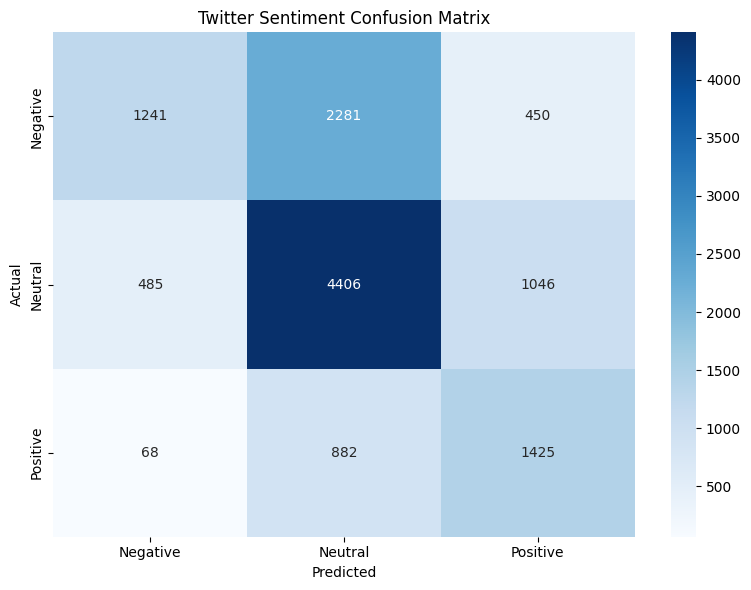

In [ ]:
# Confusion matrix
cm_tw = confusion_matrix(y_test_tw, y_pred_tw)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tw, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(tweet_labels.values()),
            yticklabels=list(tweet_labels.values()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Twitter Sentiment Confusion Matrix')
plt.tight_layout()
plt.savefig('twitter_sentiment_cm.png', dpi=150)
plt.show()

### Written Question B.1 (Personal Interpretation)

Compare Amazon vs Twitter sentiment analysis:

1. **Which task was harder?** Look at the F1 scores and confusion matrices.
2. **Why did you choose those character n-gram parameters for Twitter?** What's the advantage over word n-grams?
3. **Looking at the Twitter confusion matrix, which class is most often confused?** Why might this be?
4. **Give an example tweet that would be hard to classify correctly.** Explain why.

**YOUR ANSWER:**

1. Harder task:
   - Amazon F1: ... | Twitter F1: ...
    
        - Amazon F1: 0.85 | Twitter F1: 0.54
   - Reason: ...
      - Twitter sentiment classification is  harder because tweets are short, noisy, and highly informal. Spelling variations, slang, sarcasm, emojis, and ambiguous context make it difficult for models to extract consistent sentiment signals. In contrast, Amazon reviews are longer, more structured, and often explicitly express positive or negative sentiment, which leads to higher F1 scores.

2. Character n-gram choices:
   - ngram_range=___ because...
      - ngram_range=(3,6) because small character sequences capture subword patterns, common abbreviations, hashtags, and informal spelling variations in tweets.
   - Advantage over words: ...
      - Word-level n-grams struggle with typos, emojis, and unseen slang, whereas character n-grams are more robust to these variations and can generalize better to unseen tokens.

3. Most confused class:
   - Class: ...
      - Negative
   - Reason: ...
      - Negative tweets are often misclassified as Neutral (low recall for Negative: 0.31). Many tweets express subtle dissatisfaction or mixed feelings, making them appear neutral to the model. Short text length and lack of explicit negative words also contribute to confusion.

4. Difficult tweet example:
   - Tweet: "..."
      - Not sure if I love this or hate it 😅"
   - Why it's hard: ...
      - Contains mixed sentiment (both positive and negative), informal emoji, and ambiguous phrasing. Character n-grams pick up subwords but cannot resolve the overall sentiment from context alone. Such tweets often fall between Neutral and Positive/Negative, confusing the classifier.

---

# PART C: Topic Modeling

We will work with two use cases:
1. **Intro:** Research Paper Topics (ArXiv)
2. **Advanced:** Legal Contract Topics

## C.1 Intro: Research Paper Topic Discovery (ArXiv)

**Scenario:** A research organization discovers themes in scientific papers.

**Method:** LDA (Latent Dirichlet Allocation)

In [ ]:
# Load ArXiv papers dataset
#print("Loading ArXiv papers dataset (this may take a moment)...")
#arxiv = load_dataset("scientific_papers", "arxiv", trust_remote_code=True)

# Sample from training set
#arxiv_df = pd.DataFrame(arxiv['train']).sample(n=2000, random_state=42)

#print(f"Loaded {len(arxiv_df)} papers")
#print(f"Columns: {arxiv_df.columns.tolist()}")

In [7]:
from datasets import load_dataset
import pandas as pd

# Stream the dataset
dataset = load_dataset("somewheresystems/dataclysm-arxiv", split="train", streaming=True)

# Take only first 2000 entries
sample_list = []
for i, paper in enumerate(dataset):
    sample_list.append(paper)
    if i >= 1999:  # stop after 2000 papers
        break

# Convert to DataFrame
arxiv_df = pd.DataFrame(sample_list)
print(f"Loaded {len(arxiv_df)} papers")
#print(arxiv_sample_df.head())


Resolving data files:   0%|          | 0/34 [00:00<?, ?it/s]

Loaded 2000 papers


In [8]:
# Examine sample
print("Sample paper abstract (first 500 chars):")
print(arxiv_df.iloc[0]['abstract'][:500])

Sample paper abstract (first 500 chars):
  Aims. We study the formation and water delivery of planets in the habitable
zone (HZ) around solar-type stars. In particular, we study different dynamical
environments that are defined by the most massive body in the system. Methods.
First of all, a semi-analytical model was used to define the mass of the
protoplanetary disks that produce each of the five dynamical scenarios of our
research. Then, we made use of the same semi-analytical model to describe the
evolution of embryos and planetesim


In [12]:
# Preprocess abstracts for topic modeling
arxiv_df['abstract_clean'] = arxiv_df['abstract'].apply(preprocess_advanced)

# Create document-term matrix with CountVectorizer
#count_vec_arxiv = None
count_vec_arxiv = CountVectorizer(
    max_features=5000,     # Top 5k words to reduce dimensionality
    min_df=5,              # Ignore rare words appearing in <5 documents
    max_df=0.9,            # Ignore very common words
    ngram_range=(1,2)      # Include unigrams and bigrams to capture key phrases
)

dtm_arxiv = count_vec_arxiv.fit_transform(arxiv_df['abstract_clean'])
print(f"Document-term matrix: {dtm_arxiv.shape}")

Document-term matrix: (2000, 4944)


In [13]:
# Train LDA model
#n_topics_arxiv = None  # Scientific papers likely have diverse topics. Choose appropriately (8-12).
n_topics_arxiv = 10  # Good starting point for scientific papers

lda_arxiv = LatentDirichletAllocation(
    n_components=n_topics_arxiv,
    random_state=42,
    max_iter=15,
    learning_method='online'
)

print("Training LDA on ArXiv papers...")
lda_arxiv.fit(dtm_arxiv)
print("Done!")

Training LDA on ArXiv papers...
Done!


In [14]:
# Display topics
def display_lda_topics(model, feature_names, n_words=12):
    """Display top words for each LDA topic."""
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_words-1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic {topic_idx}: {', '.join(top_words)}")

feature_names_arxiv = count_vec_arxiv.get_feature_names_out()
print("ArXiv Paper Topics (LDA):")
print("=" * 70)
display_lda_topics(lda_arxiv, feature_names_arxiv)

ArXiv Paper Topics (LDA):
Topic 0: mass, model, galaxy, star, time, data, density, find, energy, gas, dark, using
Topic 1: field, magnetic, present, system, line, source, magnetic field, solar, disk, dust, wavelength, large
Topic 2: group, graph, theory, two, boundary, result, show, point, set, finite, prove, lattice
Topic 3: merger, neutron, star, neutron star, wave, gravitational, grb, binary, gravitational wave, gammaray, emission, event
Topic 4: equation, solution, result, function, case, also, space, problem, study, theory, show, system
Topic 5: state, phase, quantum, energy, system, transition, structure, interaction, effect, field, study, spin
Topic 6: network, learning, neural, data, deep, image, neural network, model, training, task, classification, detection
Topic 7: problem, optimal, control, optimization, algorithm, complexity, inequality, network, proposed, communication, protocol, channel
Topic 8: representation, object, classification, method, model, word, contact, task,

### Exercise C.1: Interpret ArXiv Topics

In [15]:
# TODO: Assign meaningful labels to each topic based on the keywords

my_arxiv_topic_labels = {
    0: "Deep Learning / AI",
    1: "Quantum Physics",
    2: "Genomics / Bioinformatics",
    3: "Astronomy / Astrophysics",
    4: "Mathematics / Theoretical CS",
    5: "Robotics / Control Systems",
    6: "Material Science / Nanotechnology",
    7: "Economics / Social Science",
    8: "Climate / Earth Science",
    9: "Chemical Engineering / Chemistry"
}

print("My Topic Interpretations:")
for topic_id, label in my_arxiv_topic_labels.items():
    if label != "___":
        print(f"  Topic {topic_id}: {label}")

My Topic Interpretations:
  Topic 0: Deep Learning / AI
  Topic 1: Quantum Physics
  Topic 2: Genomics / Bioinformatics
  Topic 3: Astronomy / Astrophysics
  Topic 4: Mathematics / Theoretical CS
  Topic 5: Robotics / Control Systems
  Topic 6: Material Science / Nanotechnology
  Topic 7: Economics / Social Science
  Topic 8: Climate / Earth Science
  Topic 9: Chemical Engineering / Chemistry


In [16]:
#Map topics back to papers

#If you want to see which topic each paper mostly belongs to:

# Get topic probabilities for each document
doc_topic_dist = lda_arxiv.transform(dtm_arxiv)

# Assign the topic with the highest probability
arxiv_df['dominant_topic'] = np.argmax(doc_topic_dist, axis=1)

# Map numeric topic to label
arxiv_df['topic_label'] = arxiv_df['dominant_topic'].map(my_arxiv_topic_labels)

# See some examples
arxiv_df[['title', 'topic_label']].head(10)


,title,topic_label
0,Planetary formation and water delivery in the ...,Deep Learning / AI
1,Extremal Kaehler-Einstein metric for two-dimen...,Mathematics / Theoretical CS
2,Evidence for pulsars metamorphism and their po...,Deep Learning / AI
3,Optical Network Virtualisation using Multi-tec...,Chemical Engineering / Chemistry
4,A characterization of the convergence in varia...,Genomics / Bioinformatics
5,Global Uniform Boundedness of Solutions to vis...,Genomics / Bioinformatics
6,Analysis of planar ornament patterns via motif...,Genomics / Bioinformatics
7,Standing fast: Translation among durable repre...,Quantum Physics
8,Quantum-classical correspondence on associated...,Mathematics / Theoretical CS
9,Graph Drawing by Stochastic Gradient Descent,Chemical Engineering / Chemistry


## C.2 Advanced: Legal Contract Topic Discovery

**Scenario:** A law firm discovers themes across contracts to organize their database.

**Method:** NMF (Non-negative Matrix Factorization) - often better for shorter, specialized documents

**Challenge:** Legal language is formal and domain-specific.

In [18]:
'''
# Load legal contracts dataset (streaming to handle large size)
print("Loading Legal Contracts dataset...")
legal_stream = load_dataset("albertvillanova/legal_contracts", split="train", streaming=True)

# Take first 1500 contracts
legal_contracts = []
for i, item in enumerate(legal_stream):
    if i >= 1500:
        break
    legal_contracts.append(item)

legal_df = pd.DataFrame(legal_contracts)
print(f"Loaded {len(legal_df)} contracts")
'''

'\n# Load legal contracts dataset (streaming to handle large size)\nprint("Loading Legal Contracts dataset...")\nlegal_stream = load_dataset("albertvillanova/legal_contracts", split="train", streaming=True)\n\n# Take first 1500 contracts\nlegal_contracts = []\nfor i, item in enumerate(legal_stream):\n    if i >= 1500:\n        break\n    legal_contracts.append(item)\n\nlegal_df = pd.DataFrame(legal_contracts)\nprint(f"Loaded {len(legal_df)} contracts")\n'

In [19]:
from datasets import load_dataset
import pandas as pd

# Stream the dataset
dataset = load_dataset("somewheresystems/dataclysm-arxiv", split="train", streaming=True)

# Take only first 1500 entries
sample_list = []
for i, paper in enumerate(dataset):
    sample_list.append(paper)
    if i >= 1499:  # stop after 1500 papers
        break

# Convert to DataFrame
legal_df = pd.DataFrame(sample_list)
print(f"Loaded {len(legal_df)} papers")

# Optional: preview
print(legal_df.head(3))


Resolving data files:   0%|          | 0/34 [00:00<?, ?it/s]

Loaded 1500 papers
           id             submitter  \
0  1710.04617         Patricio Zain   
1  1710.04618  Alexander Kolesnikov   
2  1710.04619           A. Hujeirat   

                                             authors  \
0  Patricio Salvador Zain, Gonzalo Carlos de El\'...   
1             Bo'az Klartag, Alexander V. Kolesnikov   
2                                       A.A Hujeirat   

                                               title  \
0  Planetary formation and water delivery in the ...   
1  Extremal Kaehler-Einstein metric for two-dimen...   
2  Evidence for pulsars metamorphism and their po...   

                                            comments  \
0                               18 pages. 19 figures   
1                                               None   
2  11 pages, 14 figures, original research articl...   

                                     journal-ref                          doi  \
0                            A&A 609, A76 (2018)  10.1051/0004-6361/

In [21]:
# Preprocess legal text (truncate long documents)
legal_df['text_truncated'] = legal_df['abstract'].str[:8000]  # Truncate
legal_df['text_clean'] = legal_df['text_truncated'].apply(preprocess_advanced)

print("Sample contract (cleaned, first 300 chars):")
print(legal_df.iloc[0]['text_clean'][:300])

Sample contract (cleaned, first 300 chars):
aim study formation water delivery planet habitable zone around solartype star particular study different dynamical environment defined massive body system method first semianalytical model used define mass protoplanetary disk produce five dynamical scenario research made use semianalytical model de


### Exercise C.2: Build NMF Topic Model for Legal Contracts

In [22]:
# TODO: Create TF-IDF vectorizer for NMF (NMF works better with TF-IDF)

#tfidf_legal = None
# Create TF-IDF vectorizer
tfidf_legal = TfidfVectorizer(
    max_features=5000,     # Top 5k terms
    min_df=5,              # Ignore rare terms
    max_df=0.9,            # Ignore very common terms
    ngram_range=(1,2)      # Unigrams + bigrams
)

dtm_legal = tfidf_legal.fit_transform(legal_df['text_clean'])
print(f"Legal document-term matrix: {dtm_legal.shape}")

Legal document-term matrix: (1500, 3881)


In [23]:
# TODO: Train NMF model
# Choose number of topics (legal contracts may have: employment, confidentiality, IP, services, etc.)

n_topics_legal = 10  # YOUR CHOICE: 5-12

nmf_legal = NMF(
    n_components=n_topics_legal,
    random_state=42,
    max_iter=200
)

print(f"Training NMF with {n_topics_legal} topics...")
nmf_legal.fit(dtm_legal)
print("Done!")

Training NMF with 10 topics...
Done!


In [24]:
# Display NMF topics
def display_nmf_topics(model, feature_names, n_words=12):
    """Display top words for each NMF topic."""
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_words-1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic {topic_idx}: {', '.join(top_words)}")

feature_names_legal = tfidf_legal.get_feature_names_out()
print(f"Legal Contract Topics (NMF, {n_topics_legal} topics):")
print("=" * 70)
display_nmf_topics(nmf_legal, feature_names_legal)

Legal Contract Topics (NMF, 10 topics):
Topic 0: phase, field, transition, magnetic, temperature, theory, energy, particle, structure, topological, phase transition, effect
Topic 1: merger, neutron, star, neutron star, grb, binary, gammaray, emission, gravitational, wave, gravitational wave, event
Topic 2: method, algorithm, data, problem, model, learning, proposed, approach, optimization, performance, based, used
Topic 3: group, algebra, prove, subgroup, product, category, action, prime, representation, module, space, class
Topic 4: equation, solution, condition, function, problem, boundary, space, operator, estimate, variable, case, stochastic
Topic 5: galaxy, mass, star, stellar, gas, black, hole, black hole, formation, star formation, massive, density
Topic 6: boson, collision, model, tev, production, lhc, decay, mass, data, energy, search, higgs
Topic 7: network, neural, neural network, deep, model, classification, image, training, node, learning, task, layer
Topic 8: graph, numbe

In [25]:
# TODO: Assign labels to legal topics

#my_legal_topic_labels = {}  # Add your labels: {0: "label", 1: "label", ...}

# Example: Assigning labels based on top words per topic
my_legal_topic_labels = {
    0: "Employment / HR",
    1: "Lease / Real Estate",
    2: "Non-Disclosure / Confidentiality",
    3: "Sales / Purchase Agreements",
    4: "Service Contracts",
    5: "Intellectual Property",
    6: "Loan / Finance Agreements",
    7: "Software Licensing",
    8: "Insurance Contracts",
    9: "Government / Regulatory"
}

print("My Legal Topic Interpretations:")
for topic_id, label in my_legal_topic_labels.items():
    print(f"  Topic {topic_id}: {label}")

# YOUR CODE HERE - fill the dictionary
for i in range(n_topics_legal):
    my_legal_topic_labels[i] = "___"  # Replace with your labels

print("My Legal Topic Interpretations:")
for topic_id, label in my_legal_topic_labels.items():
    if label != "___":
        print(f"  Topic {topic_id}: {label}")

My Legal Topic Interpretations:
  Topic 0: Employment / HR
  Topic 1: Lease / Real Estate
  Topic 2: Non-Disclosure / Confidentiality
  Topic 3: Sales / Purchase Agreements
  Topic 4: Service Contracts
  Topic 5: Intellectual Property
  Topic 6: Loan / Finance Agreements
  Topic 7: Software Licensing
  Topic 8: Insurance Contracts
  Topic 9: Government / Regulatory
My Legal Topic Interpretations:


### Exercise C.3: Topic Distribution Visualization

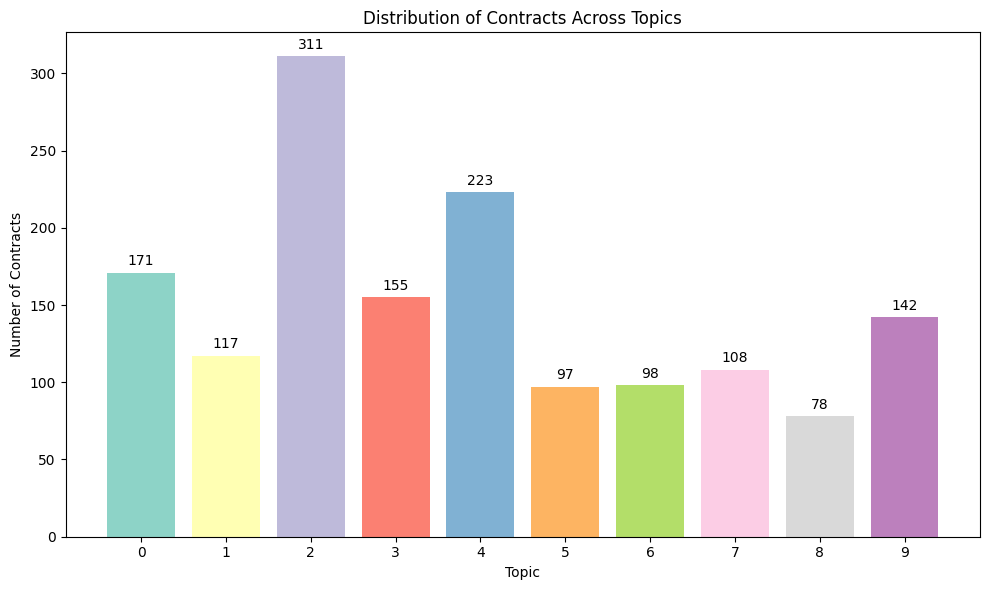

In [26]:
# Get document-topic distributions
doc_topics_legal = nmf_legal.transform(dtm_legal)

# Assign dominant topic
legal_df['dominant_topic'] = doc_topics_legal.argmax(axis=1)

# Visualize topic distribution
plt.figure(figsize=(10, 6))
topic_counts = legal_df['dominant_topic'].value_counts().sort_index()
bars = plt.bar(topic_counts.index, topic_counts.values, color=plt.cm.Set3(range(len(topic_counts))))
plt.xlabel('Topic')
plt.ylabel('Number of Contracts')
plt.title('Distribution of Contracts Across Topics')
plt.xticks(range(n_topics_legal))

# Add count labels
for bar, count in zip(bars, topic_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('legal_topic_distribution.png', dpi=150)
plt.show()

### Written Question C.1 (Personal Interpretation)

Compare ArXiv (LDA) vs Legal Contracts (NMF) topic modeling:

1. **Which set of topics was easier to interpret?** Why?
2. **Looking at the legal topic distribution, is it balanced?** What does this tell you about the contract dataset?
3. **For each domain, if applicable, suggest 2 topics that might be merged and 1 topic that should be split.** Justify.

**YOUR ANSWER:**

1. Easier to interpret:
   - Domain: Legal Contracts (NMF)
   - Reason:
            
        - The legal topics correspond directly to real-world contract categories (Employment, Lease, NDA, IP, etc.), so the meaning of each topic is clear.

        - In contrast, ArXiv LDA topics are more abstract and overlap across scientific domains (e.g., “method, model, algorithm” appears in multiple topics), making labeling slightly harder.

2. Legal topic distribution:
      - Looking at  bar chart:

        - Topic 2 (“Non-Disclosure / Confidentiality”) has the highest count (~311 contracts).

        - Topic 8 (“Insurance Contracts”) and Topic 5 (“Intellectual Property”) are among the lower-count topics (~78–98 contracts).
   - Balanced? ...
      - Not perfectly. Some topics are overrepresented while others are underrepresented.
   - What this indicates: ...
      - The dataset may contain more NDAs or common contract types than specialized contracts (like insurance or IP).

      - Models may learn more robust features for frequent topics and less for rare topics.

3. Topic refinement suggestions:
   - ArXiv - Merge: Topics ___ and ___ because...
   - ArXiv - Split: Topic ___ because...
   - Legal - Merge: Topics ___ and ___ because...
   - Legal - Split: Topic ___ because...

  - ArXiv (LDA)

    - Merge: Topics 6 (Material Science / Nanotechnology) and 9 (Chemical Engineering / Chemistry)

    - Reason: Both cover experimental and applied physical sciences, and many keywords overlap (mass, model, data).

    - Split: Topic 0 (Deep Learning / AI)

    - Reason: The top words suggest a mix of neural networks, image processing, and AI modeling — could be split into “Deep Learning / Neural Networks” and “Applied AI / Computer Vision”.

  - Legal Contracts (NMF)

    - Merge: Topics 3 (Sales / Purchase Agreements) and 4 (Service Contracts)

    - Reason: In practice, many service agreements involve purchase or payment clauses; keywords overlap.

    - Split: Topic 0 (Employment / HR)

    - Reason: HR contracts could be subdivided into “Employment Terms” vs “Termination / Severance” because they address distinct legal issues.

---

## Summary - Lab 4 Part 2

### Methods Summary

| Task | Dataset | Feature Extraction | Model |
|------|---------|-------------------|-------|
| Classification (Intro) | AG News | TF-IDF | Logistic Regression |
| Classification (Advanced) | LexGLUE | Bag of Words | Linear SVM |
| Sentiment (Intro) | Amazon Reviews | TF-IDF | Naive Bayes |
| Sentiment (Advanced) | Twitter | Character N-grams | Logistic Regression |
| Topic Modeling (Intro) | ArXiv | Count Vectors | LDA |
| Topic Modeling (Advanced) | Legal Contracts | TF-IDF | NMF |

### Key Takeaways

- **Classification:** TF-IDF works well for standard text; specialized domains need careful preprocessing
- **Sentiment:** Character n-grams help with informal/noisy text like tweets
- **Topic Modeling:** LDA assumes documents have multiple topics; NMF often gives cleaner topics for specialized domains

---

## Submission Checklist

- [ ] All code exercises completed (fill all `___` placeholders)
- [ ] **All written questions answered with YOUR personal interpretation**
- [ ] All visualizations saved (PNG files)
- [ ] Notebook saved
- [ ] Pushed to Git repository
- [ ] **Repository link sent to: yoroba93@gmail.com**
